In [1]:
%pylab inline

import pickle
import gzip
from glob import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from itertools import combinations
from collections import Counter
import networkx as nx

Calculate the entropy and inter time interval.

We start with the sequence of a single agent and we measure its contact entropy (i.e. each time he contact or is contacted by a new guy) and the link entropy (each time he activates a link).

Since we are dealing with different systems we project the events from (a1, a2, ..., an) to ((a1, a2), (a1, a3), ..., (an-1, an))

In [3]:
selected = "URNS_APS"

if selected == "TWT":
    inputDir = "/home/ubi/owncloud/PhD/TVN/strong_ties/data/twitter/twitter/data-01-09/*"
    !head /home/ubi/owncloud/PhD/TVN/strong_ties/data/twitter/twitter/data-01-09/timed-net-2008-01-01.dat
    gzipped = False
    lineSplitter = lambda l: combinations([int(e) for e in l.strip().split()], 2)
elif selected == "APS":
    inputDir = "/home/ubi/owncloud/PhD/TVN/strong_ties/data/APS/aff_data_ISI_original_divided_per_month_1960_2006/*"
    !head /home/ubi/owncloud/PhD/TVN/strong_ties/data/APS/aff_data_ISI_original_divided_per_month_1960_2006/1960-01.dat
    gzipped = False
    lineSplitter = lambda l: combinations([int(e) for e in l.strip().split()], 2)
elif selected == "URNS_TWT":
    inputDir = "/home/ubi/urns/data_analyzed/Symm_SonsExchg0_StrctSmpl1_r05_n05_t000005000000_Run_00/*"
    !gunzip -c /home/ubi/urns/data_analyzed/Symm_SonsExchg0_StrctSmpl1_r05_n05_t000005000000_Run_00/time_000000.dat  | head 
    gzipped = True
    lineSplitter = lambda l: [[int(e) for e in l.strip().split()[:2]]]
elif selected == "URNS_APS":
    inputDir = "/home/ubi/urns_serie/data_analyzed/Symm_SonsExchg1_StrctSmpl2_r06_n15_t000000500000_Run_00/*"
    !gunzip -c /home/ubi/urns_serie/data_analyzed/Symm_SonsExchg1_StrctSmpl2_r06_n15_t000000500000_Run_00/time_000000.dat  | head 
    gzipped = True
    lineSplitter = lambda l: [[int(e) for e in l.strip().split()[:2]]]
elif selected == "MPC":
    inputDir = "/home/ubi/tel/data/*"
    !gunzip -c /home/ubi/tel/data/events_part_1.txt.gz | head 
    gzipped = True
    lineSplitter = lambda l: [[int(e) for e in l.strip().split()[1:3]]]
elif selected == "URNS_MPC":
    inputDir = "/home/ubi/urns_serie/data_analyzed/Symm_SonsExchg1_StrctSmpl1_r21_n07_t000050000000_Run_00/*"
    !gunzip -c /home/ubi/urns_serie/data_analyzed/Symm_SonsExchg1_StrctSmpl1_r21_n07_t000050000000_Run_00/time_000000.dat  | head 
    gzipped = True
    lineSplitter = lambda l: [[int(e) for e in l.strip().split()[:2]]]
elif selected == "URNS_PROVA":
    inputDir = "/home/ubi/urns/data_analyzed/Symm_SonsExchg1_StrctSmpl0_r10_n05_t000001000000_Run_00//*"
    !gunzip -c /home/ubi/urns/data_analyzed/Symm_SonsExchg1_StrctSmpl0_r10_n05_t000001000000_Run_00/time_000000.dat  | head 
    gzipped = True
    lineSplitter = lambda l: [[int(e) for e in l.strip().split()[:2]]]

gzip: /home/ubi/urns_serie/data_analyzed/Symm_SonsExchg1_StrctSmpl2_r06_n15_t000000500000_Run_00/time_000000.dat.gz: No such file or directory


In [3]:
# Grow a snowball...
seedNode = np.random.choice(Graph.nodes.keys(), size=1)
snowballTargetSize = 300

snowBall = nx.Graph()
currNodes = set(seedNode)
seenNodes = set()
while snowBall.number_of_nodes() < snowballTargetSize:
    nextNodes = set()
    for node in currNodes:
        if node in seenNodes:
            continue
        for neighb in Graph.neighbors(node):
            snowBall.add_edge(node, neighb)
            snowBall.edges[node, neighb].update(Graph.edges[(node, neighb)])
            nextNodes.add(neighb)
            
            if snowBall.number_of_nodes() > snowballTargetSize:
                break
        else:
            continue
        break
        
    if nextNodes.difference(seenNodes) == set():
        print("reached and end, no more neighbors")
        break
    print("a")
    seenNodes = seenNodes.union(currNodes)
    currNodes = nextNodes

nx.write_gml(snowBall, "%s_snowBall.gml" % selected)

NameError: name 'Graph' is not defined

In [ ]:
nx.draw(snowBall)

# Compare results for the burstiness/degree correlations parts.

Reload the files for the couple of it and proceed.

In [38]:
whatToCompare = ["TWT", "URNS_TWT"]
whatToCompare = ["APS", "URNS_APS"]
whatToCompare = ["APS_samples", "URNS_APS"]
#whatToCompare = ["MPC", "URNS_MPC"]
resultsArra = [pickle.load(gzip.open("collectiveResults_%s.pkl.gz"
                                     % selection, "rb"))
              for selection in whatToCompare]

figureNameSuffix = "-".join(whatToCompare)
if False:
    # old one
    resultsArra = []
    for selection in whatToCompare:
        resultsArra.append(
                pickle.load(open("overlapClustering_%s.pkl" % selection, "rb"))
            )
    print(selection)

    figureNameSuffix = "-".join(whatToCompare)

In [39]:
overlaps = resultsArra[0]["edgesOverlap"]
weights = resultsArra[0]["edgesWeight"]
weightsPercentiles = np.percentile(weights, np.linspace(0, 100, 20))
weightsPercentiles
avgOverlap = np.zeros(len(weightsPercentiles))
iii = 0
for weightsPercentile in weightsPercentiles:
    avgOverlap[iii] = np.mean(overlaps[np.where(weights <= weightsPercentile)])
    iii += 1

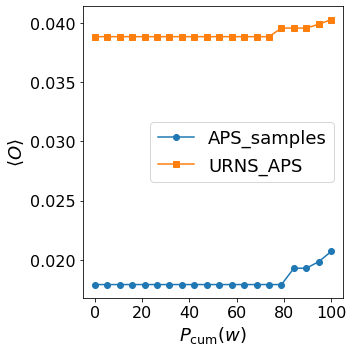

In [40]:
# Average overlap per cumulative weight percentile
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    overlaps = tmp_res["edgesOverlap"]
    weights  = tmp_res["edgesWeight"]
    weightsPercentiles = np.percentile(weights, np.linspace(0, 100, 20))
    avgOverlap = np.zeros(len(weightsPercentiles))
    iiindex = 0
    for weightsPercentile in weightsPercentiles:
        avgOverlap[iiindex] = np.mean(overlaps[np.where(weights <= weightsPercentile)])
        iiindex += 1
    
    tmp_Xs = np.linspace(0, 100, len(weightsPercentiles))
    tmp_Ys = avgOverlap
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$P_{\rm cum}(w)$", size=18)
plt.ylabel(r"$\langle O \rangle$", size=18)
plt.tight_layout()
plt.savefig("overlapVsWpct_%s.pdf" % figureNameSuffix, bbox_inches="tight")

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


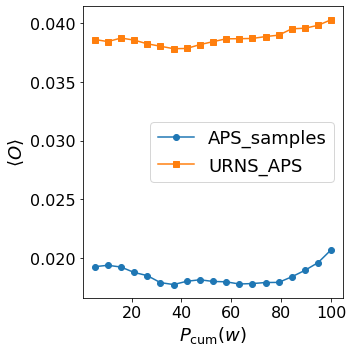

In [41]:
# Average overlap per cumulative weight position
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_Ys = tmp_res["averageOverlapPerPosi"]
    tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
    
    overlaps = np.array(tmp_res["edgesOverlap"].data)
    weights  = np.argsort(np.array(tmp_res["edgesWeight"].data))
    #weightsPercentiles = np.percentile(weights, np.linspace(0, len(overlaps), 20))
    weightsPercentiles = np.linspace(0, len(weights), 20, dtype=int)
    avgOverlap = np.zeros(len(weightsPercentiles))
    iiindex = 0
    for weightsPercentile in weightsPercentiles:
        avgOverlap[iiindex] = np.mean(overlaps[weights[:weightsPercentile]])
        iiindex += 1
    
    tmp_Ys = avgOverlap
    tmp_Xs = np.linspace(0, 100, len(weightsPercentiles))
    
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$P_{\rm cum}(w)$", size=18)
plt.ylabel(r"$\langle O \rangle$", size=18)

plt.tight_layout()
plt.savefig("overlapVsWpos_%s.pdf" % figureNameSuffix, bbox_inches="tight")

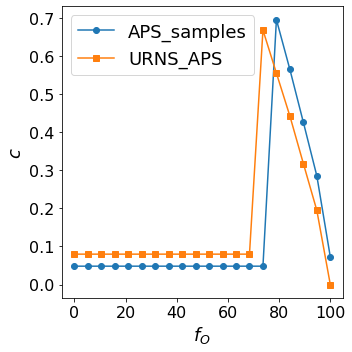

In [42]:
# Average clustering per cumulative overlap percent
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_Ys = tmp_res["averageClusterPerPerc"]
    tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$f_O$", size=18)
plt.ylabel(r"$c$", size=18)

plt.tight_layout()
plt.savefig("clusteringVsOpct_%s.pdf" % figureNameSuffix, bbox_inches="tight")

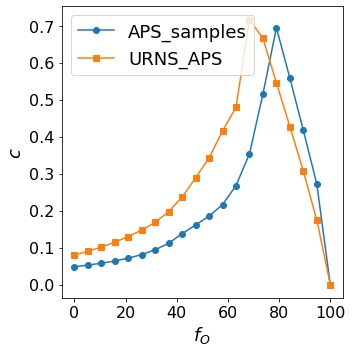

In [43]:
# Average clustering per cumulative overlap position
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_Ys = tmp_res["averageClusterPerPosi"]
    tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$f_O$", size=18)
plt.ylabel(r"$c$", size=18)

plt.tight_layout()
plt.savefig("clusteringVsOpos_%s.pdf" % figureNameSuffix, bbox_inches="tight")

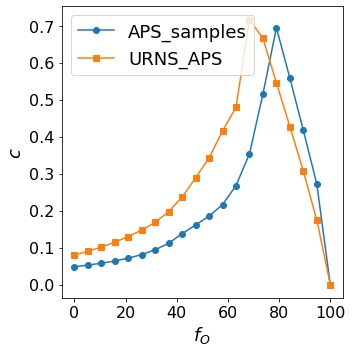

In [44]:
# Average clustering per cumulative overlap position
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_Ys = tmp_res["averageClusterPerPosi"]
    tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$f_O$", size=18)
plt.ylabel(r"$c$", size=18)

plt.tight_layout()
plt.savefig("clusteringVsOpos_%s.pdf" % figureNameSuffix, bbox_inches="tight")

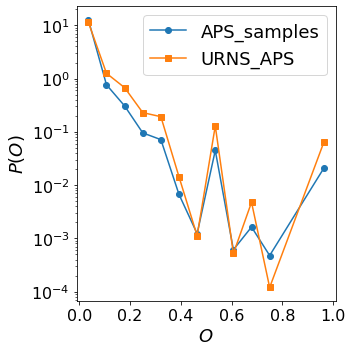

In [45]:
# Overlap distribution
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_vals = tmp_res["edgesOverlap"]
    f, b = np.histogram(tmp_vals, bins=np.linspace(0, 1., 15), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    
    plt.semilogy(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$O$", size=18)
plt.ylabel(r"$P(O)$", size=18)

plt.tight_layout()
plt.savefig("overlapDistribution_%s.pdf" % figureNameSuffix, bbox_inches="tight")

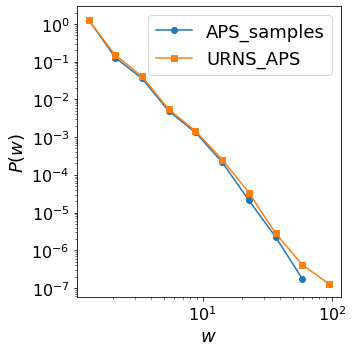

In [46]:
# Edges weights distribution
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_vals = tmp_res["edgesWeight"]
    f, b = np.histogram(tmp_vals, bins=np.logspace(0, 6, 30), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    
    plt.loglog(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$w$", size=18)
plt.ylabel(r"$P(w)$", size=18)

plt.tight_layout()
plt.savefig("weightDistribution_%s.pdf" % figureNameSuffix, bbox_inches="tight")

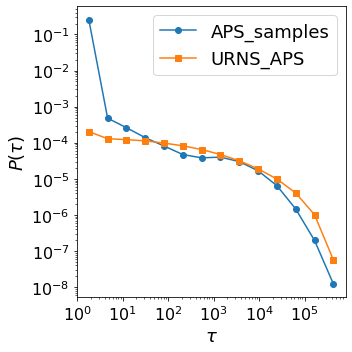

In [34]:
# Burstiness interevent time
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    b, f = tmp_res["bBurst"], tmp_res["fBurst"]
    plt.loglog(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$\tau$", size=18)
plt.ylabel(r"$P(\tau)$", size=18)

plt.tight_layout()
plt.savefig("intereventDistribution_%s.pdf" % figureNameSuffix, bbox_inches="tight")

## Plot all together

In [44]:
whatToCompare = ["TWT", "URNS_TWT", "APS", "URNS_APS", "MPC", "URNS_MPC", "APS_samples"]
resultsArra = {selection:
                   pickle.load(gzip.open("collectiveResults_%s.pkl.gz"
                                             % selection, "rb"))
              for selection in whatToCompare}

figureNameSuffix = "-".join(whatToCompare)

In [45]:
def plotAvgClusteringPerCumOverlapPos(ax, empirical, synthetic, color=0, label="***"):

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        tmp_Ys = tmp_res["averageClusterPerPosi"]
        tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
        ax.plot(tmp_Xs, tmp_Ys,
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=3)
    plt.xticks(size=16, rotation=40)
    plt.yticks(size=16)

    plt.xlabel(r"$f_O$", size=18)
    plt.ylabel(r"$c$", size=18)

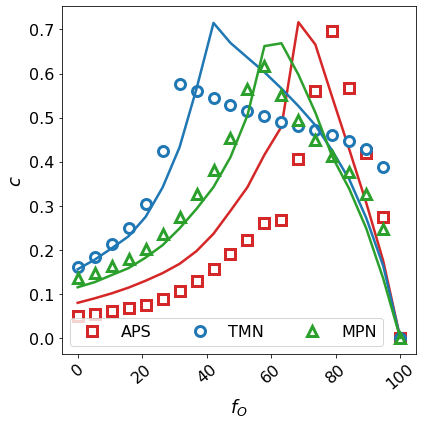

In [46]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

plotAvgClusteringPerCumOverlapPos(ax, resultsArra["APS_samples"], resultsArra["URNS_APS"], color=3, label="APS")
plotAvgClusteringPerCumOverlapPos(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN")
plotAvgClusteringPerCumOverlapPos(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN")

plt.legend(fontsize=16, loc="best", ncol=3)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("clusteringVsOpos_ALL.pdf", bbox_inches="tight")

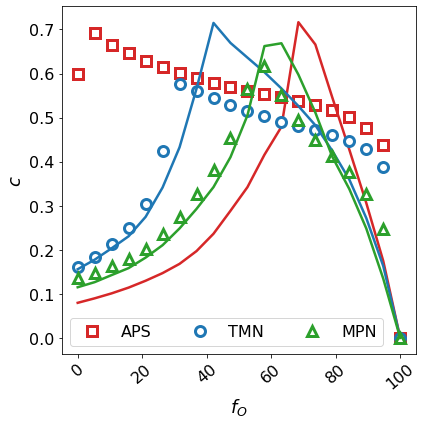

In [56]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

plotAvgClusteringPerCumOverlapPos(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS")
plotAvgClusteringPerCumOverlapPos(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN")
plotAvgClusteringPerCumOverlapPos(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN")

plt.legend(fontsize=16, loc="best", ncol=3)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("clusteringVsOpos_ALL.pdf", bbox_inches="tight")

In [48]:
def plotOverlapDistrib(ax, empirical, synthetic, color=0, label="***", scale=1.):

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        #tmp_Ys = tmp_res["averageClusterPerPosi"]
        #tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
        
        tmp_vals = tmp_res["edgesOverlap"]
        f, b = np.histogram(tmp_vals, bins=np.linspace(0, 1., 12), density=True)
        b = (b[1:] + b[:-1])/2.
        b = b[f>0]
        f = f[f>0]

        ax.semilogy(b, f*scale,
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=2)
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.xlabel(r"$O$", size=18)
    plt.ylabel(r"$P(O)$ [a.u.]", size=18)

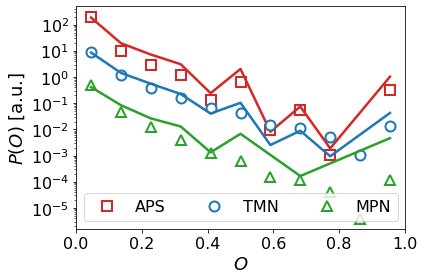

In [51]:
fig, ax = plt.subplots(1,1)

plotOverlapDistrib(ax, resultsArra["APS_samples"], resultsArra["URNS_APS"], color=3, label="APS", scale=20)
plotOverlapDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotOverlapDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=.05)

plt.legend(fontsize=16, loc="best", ncol=3)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("overlapDistribution_ALL.pdf", bbox_inches="tight")

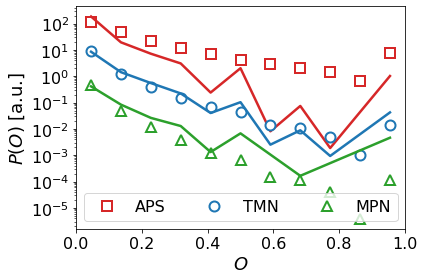

In [50]:
fig, ax = plt.subplots(1,1)

plotOverlapDistrib(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS", scale=20)
plotOverlapDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotOverlapDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=.05)

plt.legend(fontsize=16, loc="best", ncol=3)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("overlapDistribution_ALL.pdf", bbox_inches="tight")

In [52]:
def plotWeightDistrib(ax, empirical, synthetic, color=0, label="***", scale=1.):

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        tmp_vals = tmp_res["edgesWeight"]
        f, b = np.histogram(tmp_vals, bins=np.logspace(0, 6, 30), density=True)
        b = (b[1:] + b[:-1])/2.
        b = b[f>0]
        f = f[f>0]

        ax.loglog(b, f*scale,
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=2)
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.xlabel(r"$w$", size=18)
    plt.ylabel(r"$P(w)$ - [a.u.]", size=18)

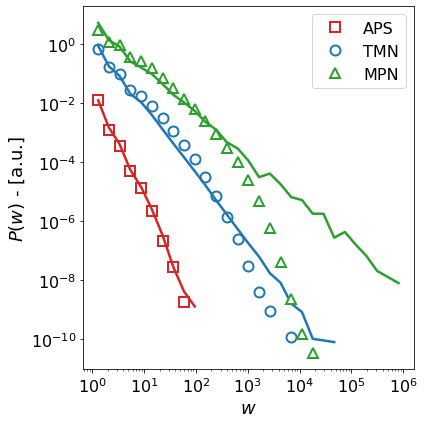

In [54]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

plotWeightDistrib(ax, resultsArra["APS_samples"], resultsArra["URNS_APS"], color=3, label="APS", scale=.01)
plotWeightDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotWeightDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=10.)

plt.legend(fontsize=16, loc="best", ncol=1)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("weightDistribution_ALL.pdf", bbox_inches="tight")

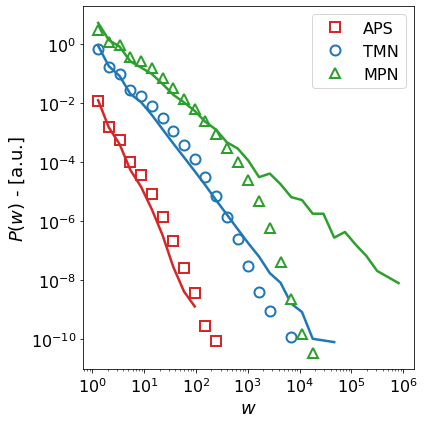

In [53]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

plotWeightDistrib(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS", scale=.01)
plotWeightDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotWeightDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=10.)

plt.legend(fontsize=16, loc="best", ncol=1)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("weightDistribution_ALL.pdf", bbox_inches="tight")

In [132]:
def plotIntereventDistrib(ax, empirical, synthetic, color=0, label="***", scale=1.):

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        b, f = tmp_res["bBurst"], tmp_res["fBurst"]
        plt.loglog(b, f, 
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=2)
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.xlabel(r"$\tau$", size=18)
    plt.ylabel(r"$P(\tau)$ [a.u.]", size=18)

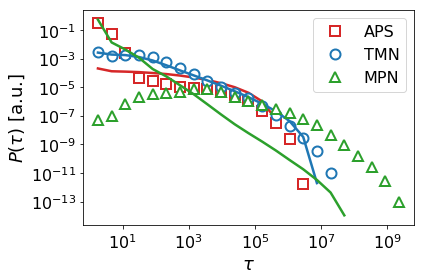

In [133]:
fig, ax = plt.subplots(1,1)

plotIntereventDistrib(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS", scale=.001)
plotIntereventDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotIntereventDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=100.)

plt.legend(fontsize=16, loc="best", ncol=1)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("intereventDistribution_ALL.pdf", bbox_inches="tight")

## Compute and collect all the curves of the APS samples to draw them

In [5]:
from glob import glob
import pandas as pd
import seaborn as sns

In [6]:
collective_APS_URNS = pickle.load(gzip.open("collectiveResults_URNS_APS.pkl.gz", "rb"))
collective_APS_REAL = pickle.load(gzip.open("collectiveResults_APS.pkl.gz", "rb"))

In [7]:
files = glob("collectiveResults_APS_samples_link*_sample*.pkl.gz")

results_APS = []

for f in files:
    data = pickle.load(gzip.open(f, "rb"))
    
    n_links = int(f.split("_link")[1][:2])
    n_sample = int(f.split("_sample")[2][:2])
    
    tmp_res = pickle.load(gzip.open(f, "rb"))
    tmp_Ys = tmp_res["averageClusterPerPosi"]
    tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
    
    results_APS.extend([(n_links, n_sample, tmp_Xs[i], tmp_Ys[i]) for i in range(len(tmp_Xs))])
results_APS = pd.DataFrame(results_APS, columns=["Sampled links", "run", r"$f_O$", r"$c$"])
#results_APS["Sampled links"] = results_APS["links"].astype(str)

In [8]:
results_APS.head()

,Sampled links,run,$f_O$,$c$
0,3,5,0.000000,0.187817
1,3,5,5.263158,0.204789
2,3,5,10.526316,0.225327
3,3,5,15.789474,0.249492
4,3,5,21.052632,0.295218


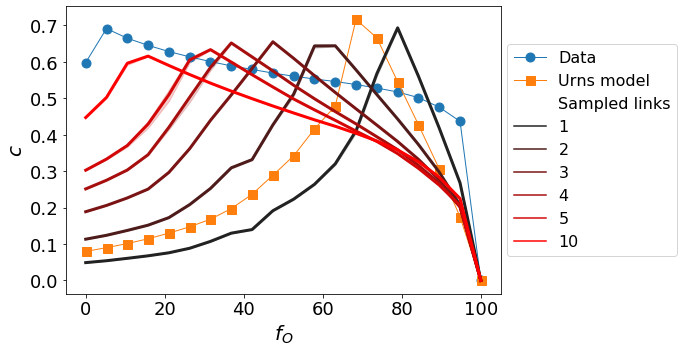

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10.5,5))

Ys = collective_APS_REAL["averageClusterPerPosi"]
ax.plot(np.linspace(0, 100, len(Ys)), Ys, "o-C0", label="Data", lw=1, ms=9)

Ys = collective_APS_URNS["averageClusterPerPosi"]
ax.plot(np.linspace(0, 100, len(Ys)), Ys, "s-C1", label="Urns model", lw=1, ms=9)

ax = sns.lineplot(x=r"$f_O$", y=r"$c$", hue="Sampled links", ci=100, data=results_APS,
                  lw=3, hue_order=[1,2,3,4,5,10], legend="full", ax=ax,
                  palette=sns.dark_palette('red', n_colors=6),
                 )

plt.xlabel(r"$f_O$", size=20)
plt.ylabel(r"$c$", size=20)

plt.xticks(size=18)
plt.yticks(size=18)

plt.legend(fontsize=16, loc="center right", bbox_to_anchor=(1.425, .5), ncol=1)

plt.tight_layout()
plt.savefig("APS_samples_clust_overlap.pdf", bbox_inches="tight")

In [38]:
results_APS["links"].value_counts()

2    200
1    200
3    180
Name: links, dtype: int64

In [39]:
results_APS[results_APS["links"]==2]

,links,run,$f_O$,$c$
20,2,7,0.000000,0.114354
21,2,7,5.263158,0.124872
22,2,7,10.526316,0.138358
23,2,7,15.789474,0.152826
24,2,7,21.052632,0.173828
...,...,...,...,...
555,2,9,78.947368,0.446301
556,2,9,84.210526,0.372333
557,2,9,89.473684,0.293318
558,2,9,94.736842,0.206587


In [ ]:
def plotAvgClusteringPerCumOverlapPos(ax, empirical, synthetic, color=0, label="***"):

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        tmp_Ys = tmp_res["averageClusterPerPosi"]
        tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
        ax.plot(tmp_Xs, tmp_Ys,
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=3)
    plt.xticks(size=16, rotation=40)
    plt.yticks(size=16)

    plt.xlabel(r"$f_O$", size=18)
    plt.ylabel(r"$c$", size=18)

# Now the same for the APS samples

# Compare results for the burstiness/degree correlations parts.

Reload the files for the couple of it and proceed.

In [11]:
import os

In [14]:
whatToCompare = ["APS", "APS_samples", "URNS_APS"]
#whatToCompare = ["MPC", "URNS_MPC"]

APS_Samples = {}

for f in sorted(glob("collectiveResults_APS_samples_link*_sample*.pkl.gz")):
    basename = os.path.basename(f)
    nLinks = int(basename.split("link")[-1].split("_")[0])
    nSample = int(basename.split("sample")[-1].split(".")[0])

    try:
        APS_Samples[nLinks][nSample] = pickle.load(gzip.open(f, "rb") )
    except KeyError:
        APS_Samples[nLinks] = {}
        APS_Samples[nLinks][nSample] = pickle.load(gzip.open(f, "rb") )
        
        
resultsArra = [pickle.load(gzip.open("collectiveResults_%s.pkl.gz"
                                     % selection, "rb"))
              for selection in whatToCompare]

figureNameSuffix = "-".join(whatToCompare)

In [15]:
overlaps = resultsArra[0]["edgesOverlap"]
weights = resultsArra[0]["edgesWeight"]
weightsPercentiles = np.percentile(weights, np.linspace(0, 100, 20))
weightsPercentiles
avgOverlap = np.zeros(len(weightsPercentiles))
iii = 0
for weightsPercentile in weightsPercentiles:
    avgOverlap[iii] = np.mean(overlaps[np.where(weights <= weightsPercentile)])
    iii += 1

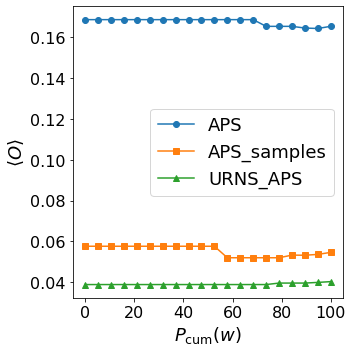

In [16]:
# Average overlap per cumulative weight percentile
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    overlaps = tmp_res["edgesOverlap"]
    weights  = tmp_res["edgesWeight"]
    weightsPercentiles = np.percentile(weights, np.linspace(0, 100, 20))
    avgOverlap = np.zeros(len(weightsPercentiles))
    iiindex = 0
    for weightsPercentile in weightsPercentiles:
        avgOverlap[iiindex] = np.mean(overlaps[np.where(weights <= weightsPercentile)])
        iiindex += 1
    
    tmp_Xs = np.linspace(0, 100, len(weightsPercentiles))
    tmp_Ys = avgOverlap
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$P_{\rm cum}(w)$", size=18)
plt.ylabel(r"$\langle O \rangle$", size=18)
plt.tight_layout()
plt.savefig("overlapVsWpct_%s.pdf" % figureNameSuffix, bbox_inches="tight")

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


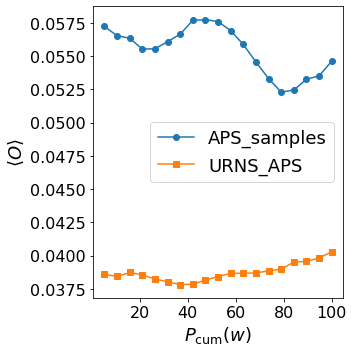

In [7]:
# Average overlap per cumulative weight position
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_Ys = tmp_res["averageOverlapPerPosi"]
    tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
    
    overlaps = np.array(tmp_res["edgesOverlap"].data)
    weights  = np.argsort(np.array(tmp_res["edgesWeight"].data))
    #weightsPercentiles = np.percentile(weights, np.linspace(0, len(overlaps), 20))
    weightsPercentiles = np.linspace(0, len(weights), 20, dtype=int)
    avgOverlap = np.zeros(len(weightsPercentiles))
    iiindex = 0
    for weightsPercentile in weightsPercentiles:
        avgOverlap[iiindex] = np.mean(overlaps[weights[:weightsPercentile]])
        iiindex += 1
    
    tmp_Ys = avgOverlap
    tmp_Xs = np.linspace(0, 100, len(weightsPercentiles))
    
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$P_{\rm cum}(w)$", size=18)
plt.ylabel(r"$\langle O \rangle$", size=18)

plt.tight_layout()
plt.savefig("overlapVsWpos_%s.pdf" % figureNameSuffix, bbox_inches="tight")

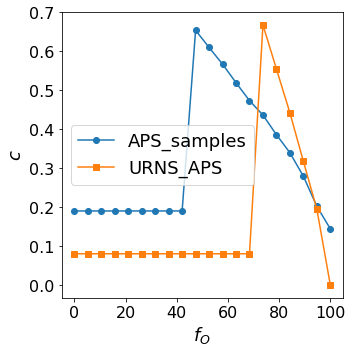

In [8]:
# Average clustering per cumulative overlap percent
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_Ys = tmp_res["averageClusterPerPerc"]
    tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$f_O$", size=18)
plt.ylabel(r"$c$", size=18)

plt.tight_layout()
plt.savefig("clusteringVsOpct_%s.pdf" % figureNameSuffix, bbox_inches="tight")

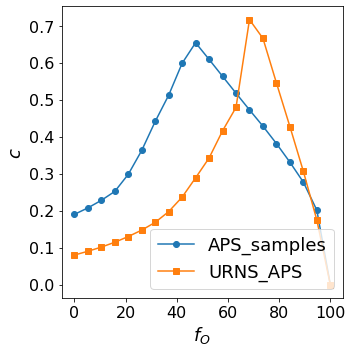

In [9]:
# Average clustering per cumulative overlap position
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_Ys = tmp_res["averageClusterPerPosi"]
    tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$f_O$", size=18)
plt.ylabel(r"$c$", size=18)

plt.tight_layout()
plt.savefig("clusteringVsOpos_%s.pdf" % figureNameSuffix, bbox_inches="tight")

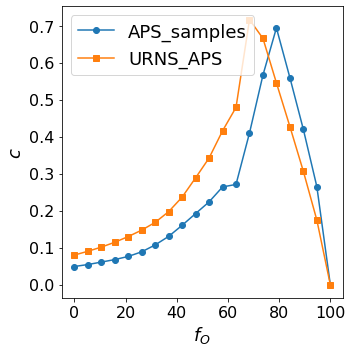

In [82]:
# Average clustering per cumulative overlap position
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_Ys = tmp_res["averageClusterPerPosi"]
    tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
    ax.plot(tmp_Xs, tmp_Ys, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$f_O$", size=18)
plt.ylabel(r"$c$", size=18)

plt.tight_layout()
plt.savefig("clusteringVsOpos_%s.pdf" % figureNameSuffix, bbox_inches="tight")

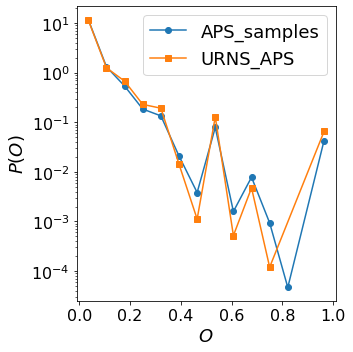

In [32]:
# Overlap distribution
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_vals = tmp_res["edgesOverlap"]
    f, b = np.histogram(tmp_vals, bins=np.linspace(0, 1., 15), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    
    plt.semilogy(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$O$", size=18)
plt.ylabel(r"$P(O)$", size=18)

plt.tight_layout()
plt.savefig("overlapDistribution_%s.pdf" % figureNameSuffix, bbox_inches="tight")

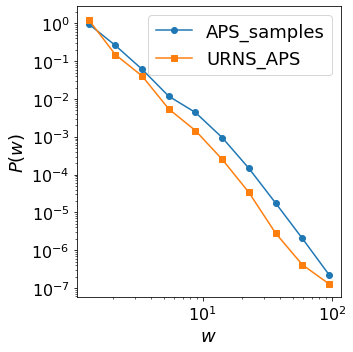

In [33]:
# Edges weights distribution
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_vals = tmp_res["edgesWeight"]
    f, b = np.histogram(tmp_vals, bins=np.logspace(0, 6, 30), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    
    plt.loglog(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$w$", size=18)
plt.ylabel(r"$P(w)$", size=18)

plt.tight_layout()
plt.savefig("weightDistribution_%s.pdf" % figureNameSuffix, bbox_inches="tight")

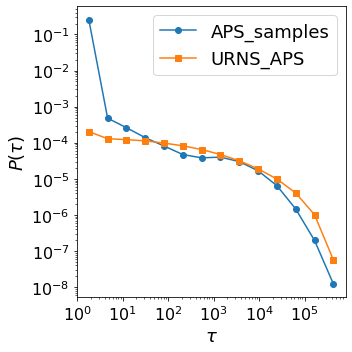

In [34]:
# Burstiness interevent time
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    b, f = tmp_res["bBurst"], tmp_res["fBurst"]
    plt.loglog(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
    
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16)
plt.yticks(size=16)

plt.xlabel(r"$\tau$", size=18)
plt.ylabel(r"$P(\tau)$", size=18)

plt.tight_layout()
plt.savefig("intereventDistribution_%s.pdf" % figureNameSuffix, bbox_inches="tight")

## Plot all together

In [44]:
whatToCompare = ["TWT", "URNS_TWT", "APS", "URNS_APS", "MPC", "URNS_MPC", "APS_samples"]
resultsArra = {selection:
                   pickle.load(gzip.open("collectiveResults_%s.pkl.gz"
                                             % selection, "rb"))
              for selection in whatToCompare}

figureNameSuffix = "-".join(whatToCompare)

In [45]:
def plotAvgClusteringPerCumOverlapPos(ax, empirical, synthetic, color=0, label="***"):

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        tmp_Ys = tmp_res["averageClusterPerPosi"]
        tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
        ax.plot(tmp_Xs, tmp_Ys,
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=3)
    plt.xticks(size=16, rotation=40)
    plt.yticks(size=16)

    plt.xlabel(r"$f_O$", size=18)
    plt.ylabel(r"$c$", size=18)

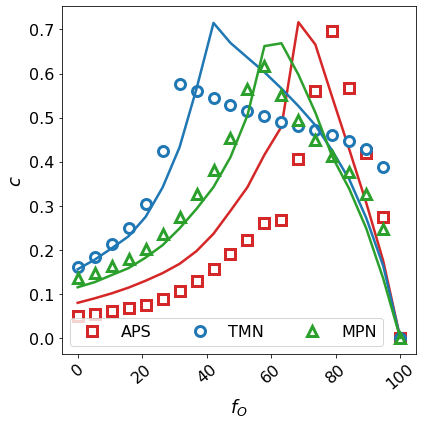

In [46]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

plotAvgClusteringPerCumOverlapPos(ax, resultsArra["APS_samples"], resultsArra["URNS_APS"], color=3, label="APS")
plotAvgClusteringPerCumOverlapPos(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN")
plotAvgClusteringPerCumOverlapPos(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN")

plt.legend(fontsize=16, loc="best", ncol=3)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("clusteringVsOpos_ALL.pdf", bbox_inches="tight")

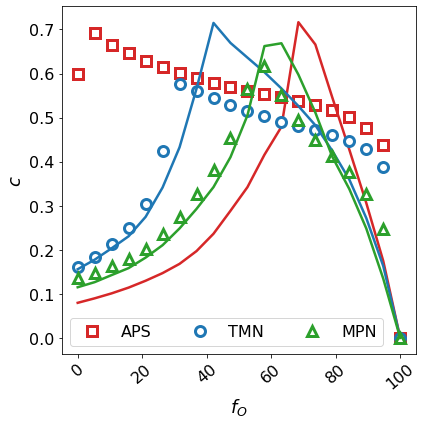

In [56]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

plotAvgClusteringPerCumOverlapPos(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS")
plotAvgClusteringPerCumOverlapPos(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN")
plotAvgClusteringPerCumOverlapPos(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN")

plt.legend(fontsize=16, loc="best", ncol=3)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("clusteringVsOpos_ALL.pdf", bbox_inches="tight")

In [48]:
def plotOverlapDistrib(ax, empirical, synthetic, color=0, label="***", scale=1.):

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        #tmp_Ys = tmp_res["averageClusterPerPosi"]
        #tmp_Xs = np.linspace(0, 100, len(tmp_Ys))
        
        tmp_vals = tmp_res["edgesOverlap"]
        f, b = np.histogram(tmp_vals, bins=np.linspace(0, 1., 12), density=True)
        b = (b[1:] + b[:-1])/2.
        b = b[f>0]
        f = f[f>0]

        ax.semilogy(b, f*scale,
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=2)
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.xlabel(r"$O$", size=18)
    plt.ylabel(r"$P(O)$ [a.u.]", size=18)

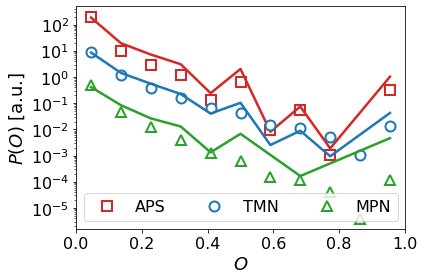

In [51]:
fig, ax = plt.subplots(1,1)

plotOverlapDistrib(ax, resultsArra["APS_samples"], resultsArra["URNS_APS"], color=3, label="APS", scale=20)
plotOverlapDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotOverlapDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=.05)

plt.legend(fontsize=16, loc="best", ncol=3)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("overlapDistribution_ALL.pdf", bbox_inches="tight")

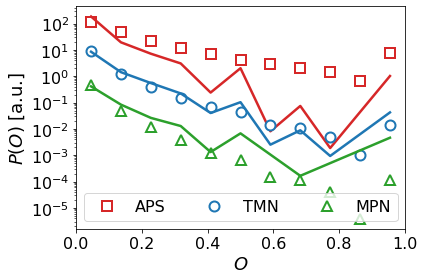

In [50]:
fig, ax = plt.subplots(1,1)

plotOverlapDistrib(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS", scale=20)
plotOverlapDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotOverlapDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=.05)

plt.legend(fontsize=16, loc="best", ncol=3)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("overlapDistribution_ALL.pdf", bbox_inches="tight")

In [52]:
def plotWeightDistrib(ax, empirical, synthetic, color=0, label="***", scale=1.):

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        tmp_vals = tmp_res["edgesWeight"]
        f, b = np.histogram(tmp_vals, bins=np.logspace(0, 6, 30), density=True)
        b = (b[1:] + b[:-1])/2.
        b = b[f>0]
        f = f[f>0]

        ax.loglog(b, f*scale,
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=2)
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.xlabel(r"$w$", size=18)
    plt.ylabel(r"$P(w)$ - [a.u.]", size=18)

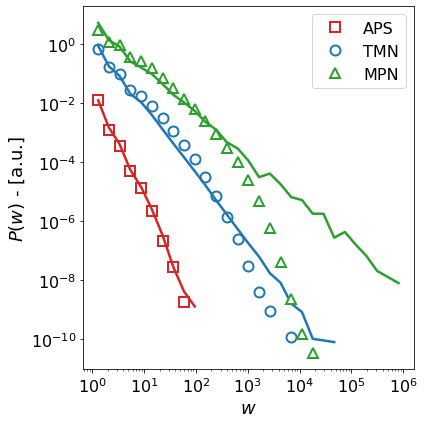

In [54]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

plotWeightDistrib(ax, resultsArra["APS_samples"], resultsArra["URNS_APS"], color=3, label="APS", scale=.01)
plotWeightDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotWeightDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=10.)

plt.legend(fontsize=16, loc="best", ncol=1)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("weightDistribution_ALL.pdf", bbox_inches="tight")

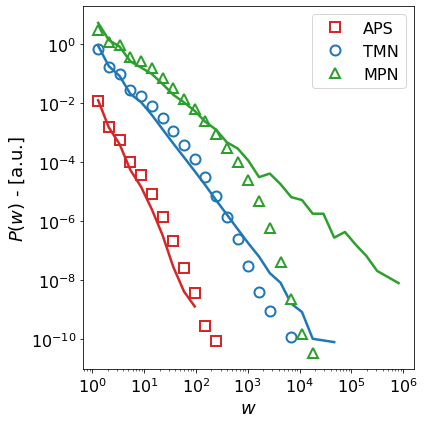

In [53]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

plotWeightDistrib(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS", scale=.01)
plotWeightDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotWeightDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=10.)

plt.legend(fontsize=16, loc="best", ncol=1)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("weightDistribution_ALL.pdf", bbox_inches="tight")

In [132]:
def plotIntereventDistrib(ax, empirical, synthetic, color=0, label="***", scale=1.):

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        b, f = tmp_res["bBurst"], tmp_res["fBurst"]
        plt.loglog(b, f, 
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=2)
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.xlabel(r"$\tau$", size=18)
    plt.ylabel(r"$P(\tau)$ [a.u.]", size=18)

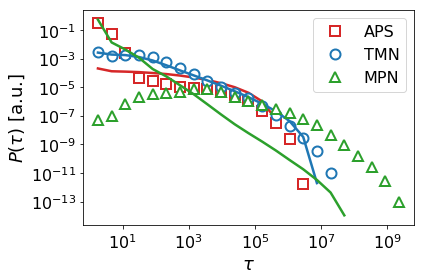

In [133]:
fig, ax = plt.subplots(1,1)

plotIntereventDistrib(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS", scale=.001)
plotIntereventDistrib(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", scale=1.)
plotIntereventDistrib(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", scale=100.)

plt.legend(fontsize=16, loc="best", ncol=1)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("intereventDistribution_ALL.pdf", bbox_inches="tight")